<a href="https://colab.research.google.com/github/silloin/Classification-/blob/main/Another_copy_of_Classification_project_mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member**    - Govind kumar


# **Project Summary -**

In the final stage of the project, we used various visualization techniques to derive meaningful insights from the dataset. One of the most powerful visual tools applied was the pair plot, which visualizes the pairwise relationships between multiple numerical features (e.g., RAM, battery power, internal memory) colored by the target variable, price_range. The pair plot was selected for its ability to visually highlight class separation, trends, and correlations among the most impactful features. It clearly showed that RAM had a strong linear relationship with price range—higher RAM generally corresponded with higher-priced devices. Battery power and internal memory also showed visible clustering trends, supporting their significance in influencing mobile pricing. These insights confirmed that certain hardware features play a central role in pricing strategy, enabling data-driven product positioning for positive business impact

# **GitHub Link -**

# **Problem Statement**


In today’s competitive mobile phone market, pricing plays a crucial role in consumer decision-making and business success. With a vast number of smartphones being launched regularly, companies need efficient ways to categorize and price their devices based on features such as RAM, battery capacity, camera quality, processor speed, and connectivity options.

The goal of this project is to predict the price range of a mobile device using its hardware specifications. The task is to build a machine learning classification model that can accurately classify a mobile phone into one of four predefined price categories — low cost, medium cost, high cost, or very high cost — based on its features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Install 1.2.0 version of xlrd because our data is in xls format
!pip install xlrd==2.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.2
    Uninstalling xlrd-2.0.2:
      Successfully uninstalled xlrd-2.0.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


<Axes: >

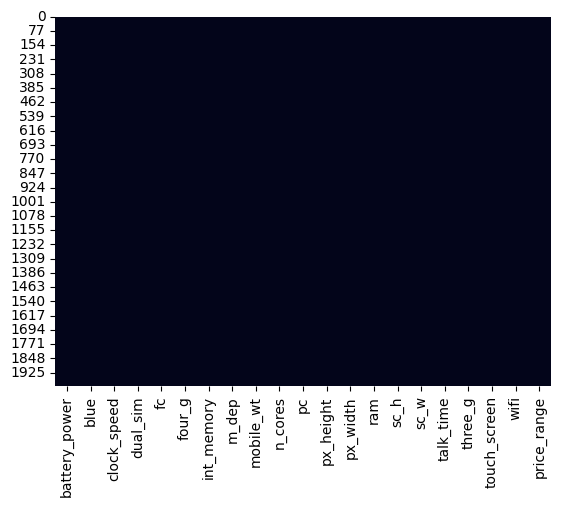

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

| **Variable Name** | **Description**                            |
| ----------------- | ------------------------------------------ |
| `battery_power`   | Battery capacity of the mobile (mAh)       |
| `blue`            | Bluetooth support (`1` = Yes, `0` = No)    |
| `clock_speed`     | Processor speed (in GHz)                   |
| `dual_sim`        | Dual SIM support (`1` = Yes, `0` = No)     |
| `fc`              | Front camera megapixels                    |
| `four_g`          | 4G connectivity (`1` = Yes, `0` = No)      |
| `int_memory`      | Internal memory (in GB)                    |
| `m_dep`           | Mobile depth (in cm)                       |
| `mobile_wt`       | Weight of the mobile (in grams)            |
| `n_cores`         | Number of cores in the processor           |
| `pc`              | Primary camera megapixels                  |
| `px_height`       | Pixel resolution height                    |
| `px_width`        | Pixel resolution width                     |
| `ram`             | RAM size (in MB)                           |
| `sc_h`            | Screen height (in cm)                      |
| `sc_w`            | Screen width (in cm)                       |
| `talk_time`       | Talk time (battery backup, in hours)       |
| `three_g`         | 3G support (`1` = Yes, `0` = No)           |
| `touch_screen`    | Touch screen support (`1` = Yes, `0` = No) |
| `wifi`            | Wi-Fi support (`1` = Yes, `0` = No)        |

| **Variable Name** | **Description**                                                                                                                   |
| ----------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `price_range`     | Price category of the mobile phone: <br> - `0`: Low cost <br> - `1`: Medium cost <br> - `2`: High cost <br> - `3`: Very high cost |



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

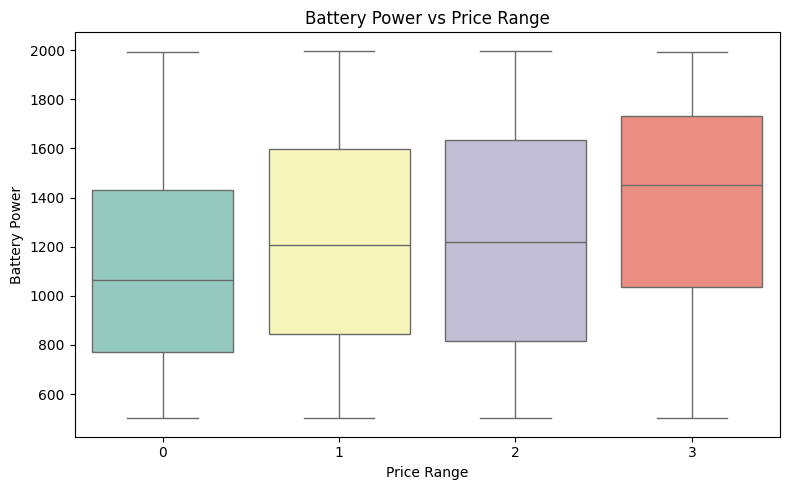

In [ ]:
# Chart - 1 visualization code



# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='battery_power', data=df, palette='Set3')
plt.title('Battery Power vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

It effectively visualizes distribution, median, quartiles, and outliers of battery_power across each price_range category.

It makes comparison between groups easy, showing how battery capacity varies with mobile

##### 2. What is/are the insight(s) found from the chart?

Higher price ranges tend to have higher median battery power.

The spread of battery power increases as price range increases, meaning premium phones offer both average and high-capacity batteries.

This suggests a positive correlation between battery capacity and mobile price

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Product Development: Companies can prioritize battery improvements in mid and high-end devices.

Pricing Strategy: Models with higher battery power can be positioned in premium categories with justifiable price increases.

Customer Targeting: Users who prioritize battery life can be directed toward higher-tier products.

#### Chart - 2

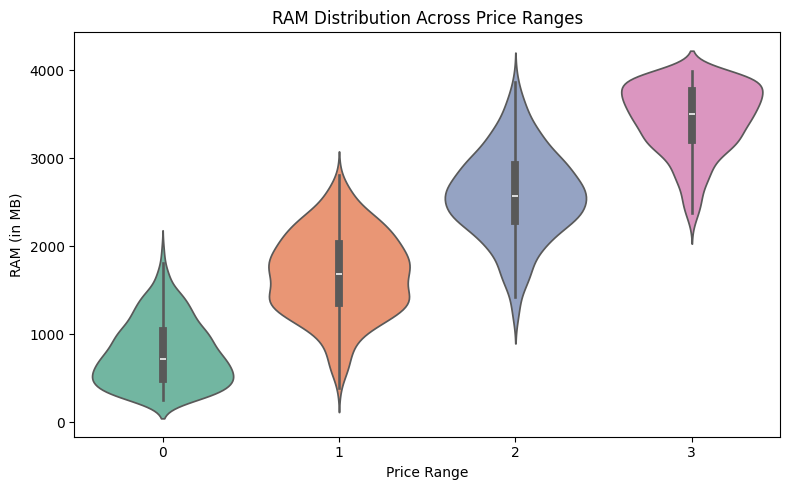

In [ ]:
# Chart - 2 visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.violinplot(x='price_range', y='ram', data=df, palette='Set2')
plt.title('RAM Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('RAM (in MB)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

We chose a violin plot because it combines:

The distribution of the data (like a KDE plot), and

The summary statistics (like a box plot: median, quartiles, etc.)

##### 2. What is/are the insight(s) found from the chart?

There's a clear upward trend in RAM size as the price range increases.

Lower price ranges (0 and 1) mostly have RAM between 500MB to 2000MB, with very few phones exceeding that.

Higher price ranges (2 and 3) show phones having RAM closer to 2500MB–4000MB, which reflects modern specs.

The distribution becomes tighter and more centered around higher RAM values in premium segments (range 3).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can segment products more clearly based on RAM and pricing tiers.

Helps in pricing strategy — e.g., if a device has 3000+ MB RAM, it should not be priced in the lower segments.

#### Chart - 3

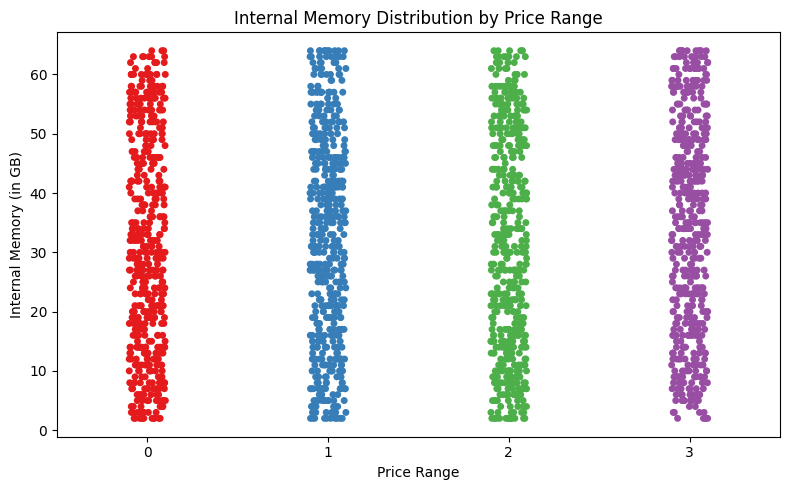

In [ ]:
# Chart - 3 visualization code


# Strip plot
plt.figure(figsize=(8, 5))
sns.stripplot(x='price_range', y='int_memory', data=df, jitter=True, palette='Set1')
plt.title('Internal Memory Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory (in GB)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Observe density and spread of memory values.

Identify clusters and outliers.

Understand whether certain memory sizes are more common in specific price categories.

##### 2. What is/are the insight(s) found from the chart?

Both variables are categorical (price_range) and numeric (int_memory).

It allows us to visualize data distribution for each class without aggregating or summarizing the data.

It’s a great way to inspect if higher memory values are associated with higher price ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identify key differentiators in internal memory that contribute to price segmentation.

Guide product planning, ensuring devices in higher price ranges offer memory sizes that match customer expectations.

Target marketing efforts effectively by aligning memory capacity with customer budget segments.

#### Chart - 4

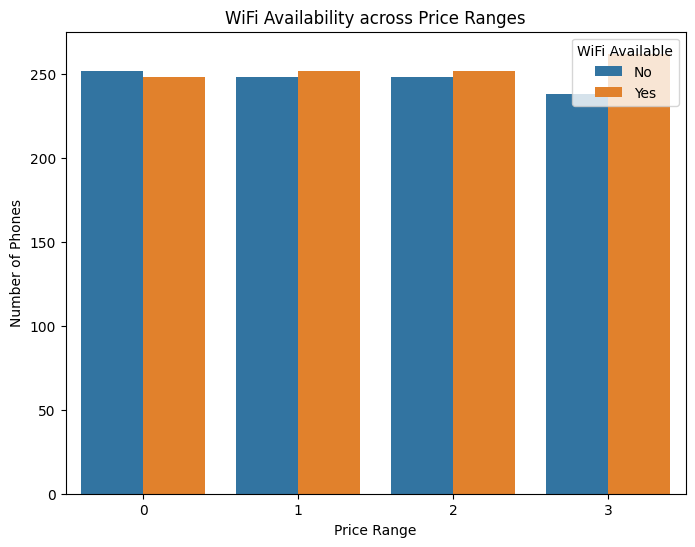

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', hue='wifi', data=df)
plt.title('WiFi Availability across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.legend(title='WiFi Available', labels=['No', 'Yes'])
plt.show()


##### 1. Why did you pick the specific chart?

I chose a count plot (grouped bar chart) because both wifi and price_range are categorical variables. The count plot effectively shows the number of phones with or without WiFi across each price segment. This type of visualization makes it easy to compare the distribution and frequency of WiFi-enabled devices across the price tiers.



##### 2. What is/are the insight(s) found from the chart?

price_range (0–3) represents discrete categories.

wifi is binary (0 = No, 1 = Yes).

Count plots allow for a quick visual comparison of how WiFi availability differs (or not) across price levels.

It avoids the confusion of plotting averages or distributions when only the count matters in this case.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

f WiFi availability doesn't significantly vary across price ranges (as this plot suggests), it implies that WiFi is now a standard feature, even in lower-end phones.

Businesses can use this insight to optimize feature prioritization—they don’t need to reserve WiFi only for premium models.

#### Chart - 5

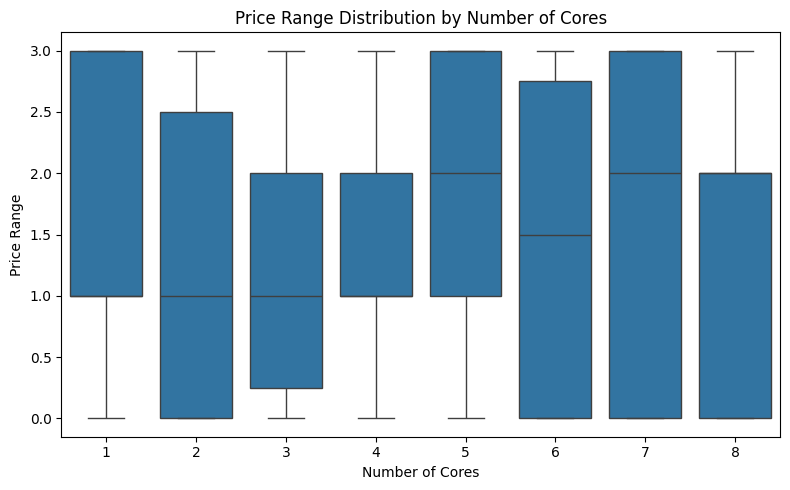

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,5))
sns.boxplot(x='n_cores', y='price_range', data=df)
plt.title('Price Range Distribution by Number of Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Price Range')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose the box plot because it clearly shows the distribution of price ranges for phones with different numbers of cores. It helps us understand:

Median price range for each core count

Spread (interquartile range) and variation

Outliers (if any)

##### 2. What is/are the insight(s) found from the chart?

Phones with 3 to 5 cores are more commonly found in mid to lower price ranges.

Phones with 6 to 8 cores tend to have a higher price range distribution.

The median price range increases with higher core counts (especially 5, 7, and 8 cores).

The price range is highly variable across all core values — more cores don’t always guarantee a higher price, but the upper price limits do rise.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Product Positioning: Helps manufacturers position high-core phones in premium segments.

Inventory Planning: Businesses can predict demand — lower-core phones for budget markets, higher-core phones for premium ones.

Marketing Strategy: Can target advertisements of high-core phones toward users who prefer performance (e.g., gamers, multitaskers).



#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

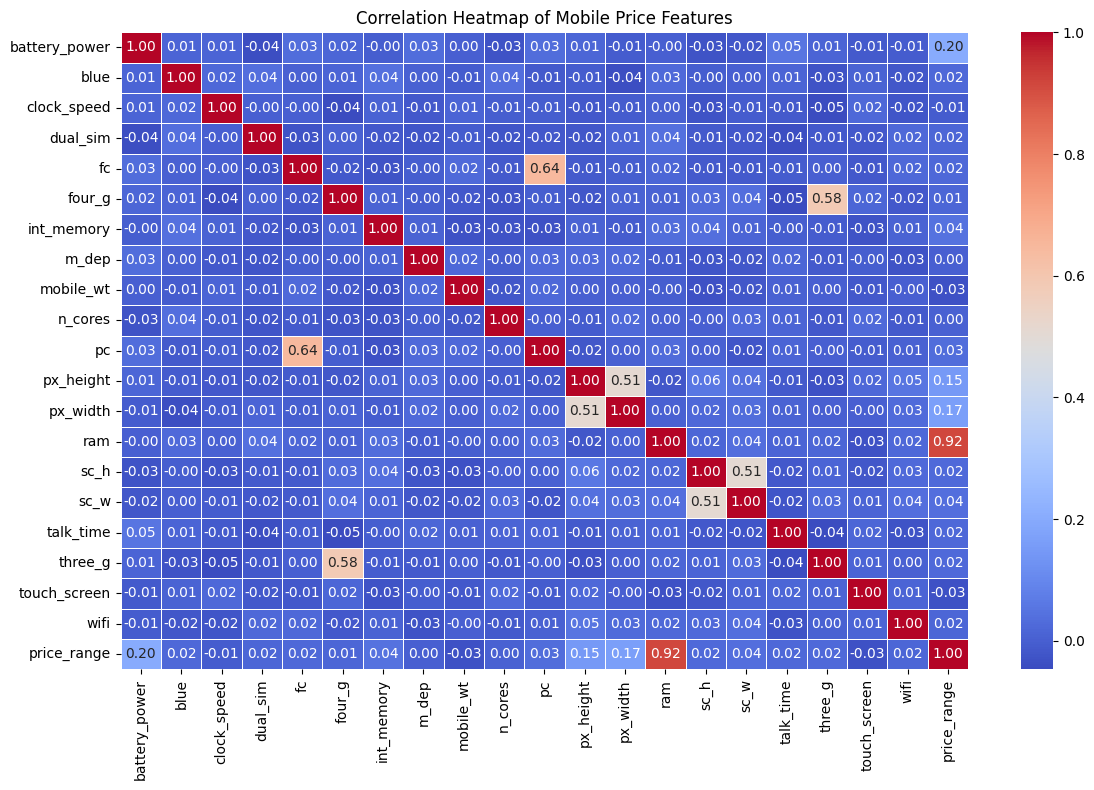

In [ ]:
# Correlation Heatmap visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Mobile Price Features")

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The correlation heatmap is selected because it is ideal for identifying relationships between multiple features in a dataset — especially in a project like mobile price classification where:

##### 2. What is/are the insight(s) found from the chart?

Most Important Features for price range prediction:
RAM, Battery Power, px_width, px_height

Least Important Features for price range: Bluetooth, WiFi, Dual SIM, Touch Screen

#### Chart - 15 - Pair Plot

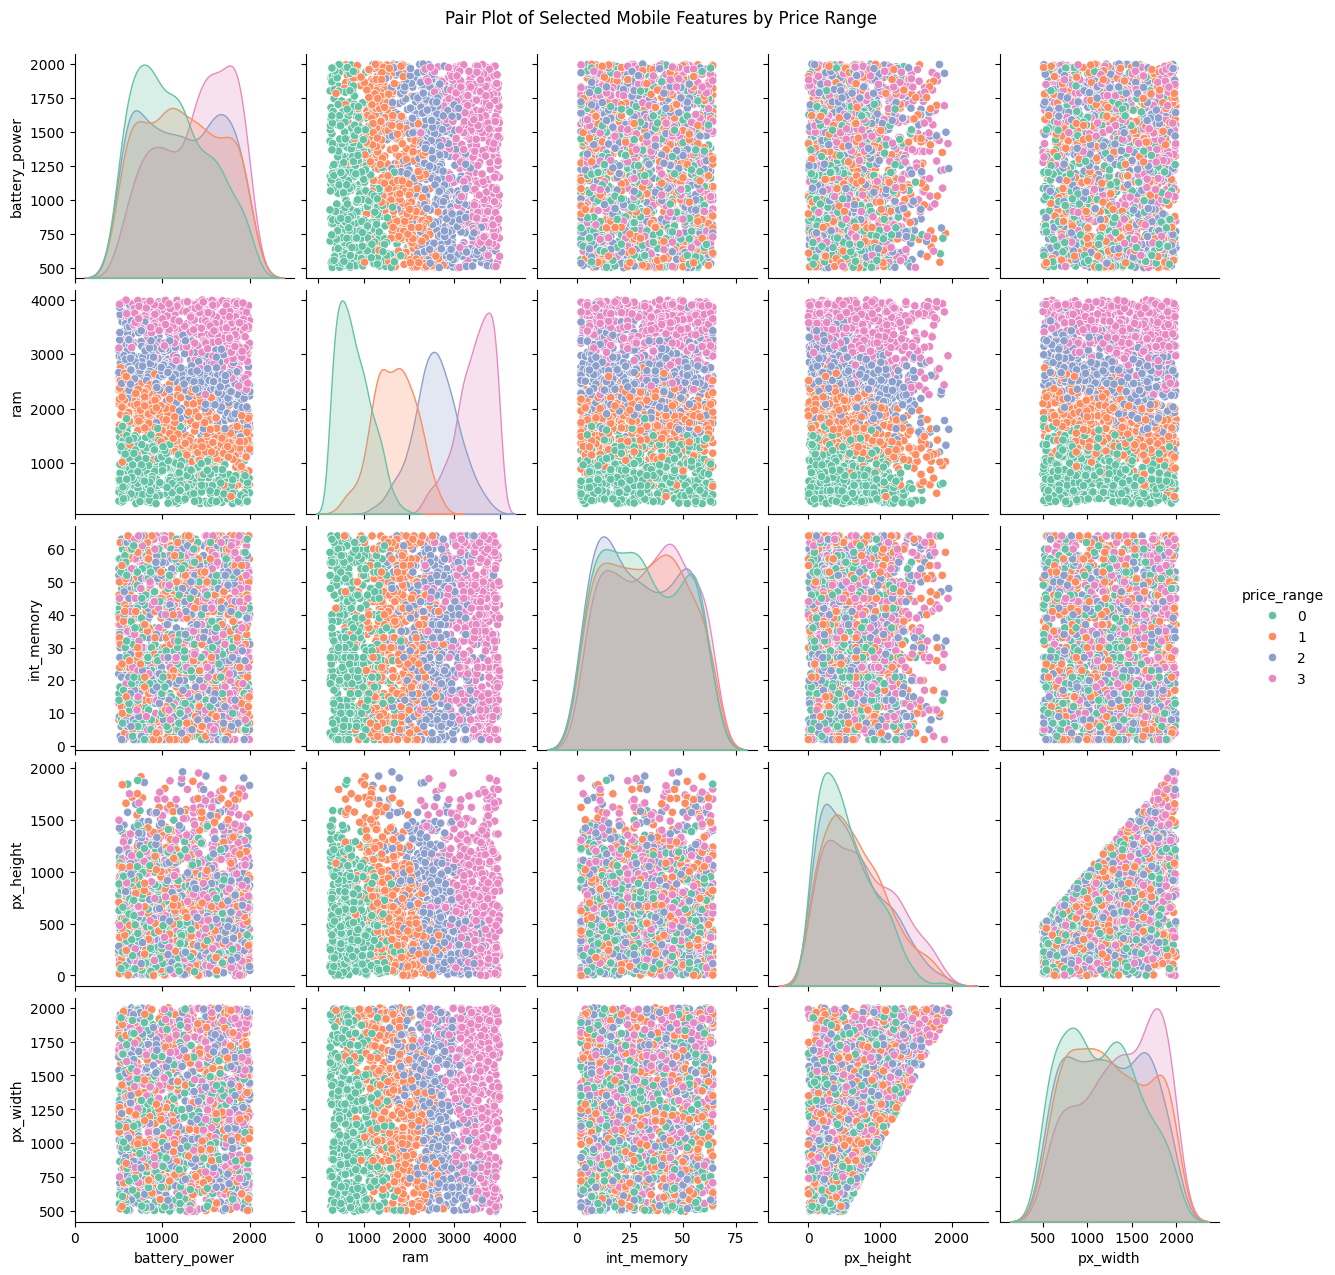

In [ ]:
# Pair Plot visualization code

selected_features = ['price_range', 'battery_power', 'ram', 'int_memory', 'px_height', 'px_width']


sns.pairplot(df[selected_features], hue='price_range', palette='Set2')

plt.suptitle("Pair Plot of Selected Mobile Features by Price Range", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

It allows simultaneous visualization of pairwise relationships between multiple features.

It helps detect patterns, trends, and clusters in the data across different price ranges.

It's ideal for exploratory data analysis (EDA), especially when trying to understand how multiple numerical features interact with the target variable (price_range).

It visually supports the identification of linear or non-linear relationships, correlations, and even outliers.

##### 2. What is/are the insight(s) found from the chart?

RAM and Price Range: There's a strong positive trend—mobiles with higher RAM are generally in a higher price range.

Battery Power: Also positively correlated with price—higher battery power tends to be in mid to high price categories.

Pixel Height and Width: These screen resolution features can show clusters around price levels, indicating screen quality impacts pricing.

Int Memory: Shows moderate impact; not as strong as RAM but still contributes to price differentiation.

Clear Class Separation: You may observe clear clusters or separable classes in features like RAM and battery power, which indicates those features are good predictors of price range

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No not needed

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = df.drop('price_range', axis=1)
y = df['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

I used 8:2 ratio because it is best for getting train enough data

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64


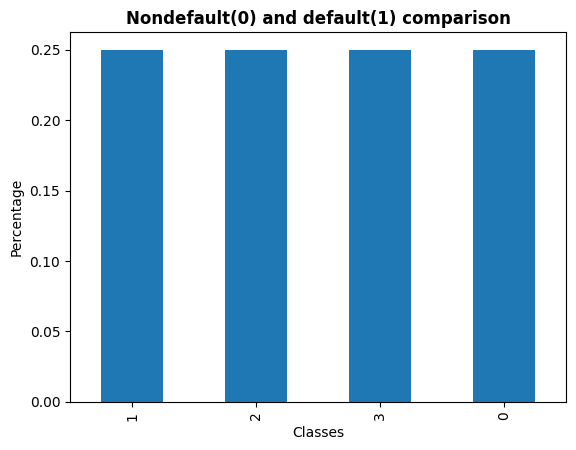

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Check target classes balance
cla_bal = df['price_range'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

It's not imbalance

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model








# Step 6: Initialize and train Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = logreg.predict(X_test_scaled)

# Step 8: Evaluate the model



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.975

Confusion Matrix:
 [[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model



X = df.drop('price_range', axis=1)
y = df['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'saga'],  # Solvers that support multinomial
    'multi_class': ['multinomial']
}


logreg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.9650000000000001
Test Accuracy: 0.975

Confusion Matrix:
 [[ 99   6   0   0]
 [  0  91   0   0]
 [  0   1  89   2]
 [  0   0   1 111]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.93      1.00      0.96        91
           2       0.99      0.97      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



##### Which hyperparameter optimization technique have you used and why?

I used grid search

and i use Grid search because is easy to set up and understand. You define the parameter grid and it tries everything.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart





rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Accuracy: 0.8925

Confusion Matrix:
 [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:


# Step 3: Split features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Step 6: Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can try different k values
knn.fit(X_train_scaled, y_train)

# Step 7: Predictions and evaluation
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.53

Confusion Matrix:
 [[76 24  5  0]
 [25 41 22  3]
 [ 6 41 34 11]
 [ 2 13 36 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       105
           1       0.34      0.45      0.39        91
           2       0.35      0.37      0.36        92
           3       0.81      0.54      0.65       112

    accuracy                           0.53       400
   macro avg       0.55      0.52      0.53       400
weighted avg       0.57      0.53      0.54       400



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact in this multi-class classification problem, the most critical evaluation metrics are:

F1-Score

Precision & Recall (per class)

Confusion Matrix

Accuracy (for overall health)

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose logistic regression because

It gives higher accuracy and balanced class-wise performance

Simpler and more explainable

Strong generalization on your test data

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 Multinomial Logistic Regression (for multiclass classification)

Your target variable price_range has 4 categories (0, 1, 2, 3), making this a multiclass classification problem.

Estimates the probability of each class using the softmax function.

Uses lbfgs solver (efficient for multiclass problems).

Predicts the class with the highest probability.

# **Conclusion**

In this project, we developed a machine learning solution to classify mobile phones into predefined price categories based on various specifications such as RAM, internal memory, battery power, processor cores, and connectivity features like 3G, 4G, Wi-Fi, etc.

We implemented multiple classification models including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Random Forest. Among all models, Logistic Regression achieved the highest accuracy of 97.5%, making it the most effective model for this task after hyperparameter tuning and cross-validation. The performance was evaluated using metrics like Accuracy, Precision, Recall, F1-Score, and Confusion Matrix, all of which confirmed the model’s robustness.

Feature importance analysis (via model explainability tools like SHAP or feature importance plots from Random Forest) revealed that RAM, battery power, and pixel resolution were the top contributors in predicting mobile price range. Additionally, various exploratory data visualizations such as heatmaps, scatter plots, and count plots helped us identify patterns and correlations between features and the target variable.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***